## Download images from Google

Go till the end of the page wherein they show more images to be loaded tab. then run the java script

save the files as urls_black.csv and other class names

upload these files in bears folder

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
folder = 'black'
file = 'urls_black.csv'

In [3]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [72]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [4]:
folder = 'teddys'
file = 'urls_teddys.csv'

In [5]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [75]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [6]:
folder = 'grizzly'
file = 'urls_grizzly.csv'

In [7]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [79]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [8]:
path.ls()

[PosixPath('data/bears/export.pkl'),
 PosixPath('data/bears/urls_grizzly.csv'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/urls_teddys.csv'),
 PosixPath('data/bears/.ipynb_checkpoints'),
 PosixPath('data/bears/urls_black.csv')]

In [9]:
classes = ['teddys','grizzly','black']

### Remove images that cannot be opened (corrupted)

In [11]:
for c in classes:
    print(c)
    verify_images(path/c,delete=True,max_workers=8)

teddys


grizzly


black


### Even if the data is unbalanced (all arrays not having same number of files) it still works for most of the data

## View data

In [12]:
np.random.seed(42)

This data is directly downloaded from Google, we do not have a validation set as the actual Kaggle or other download data

In the databunch, the training set is all the files in the current folder and set aside valid_pct = 20% of the data for validation -- automatic and random validation state


We should have same validation set everytime ( and hence set the randomseed ), because when you are trying to check if a change in  hyperparameter improved the model, we might not verify accurately as everytime we get a new validation set



In [13]:
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,
                                 ds_tfms = get_transforms(),size=224,
                                 num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['black', 'grizzly', 'teddys']

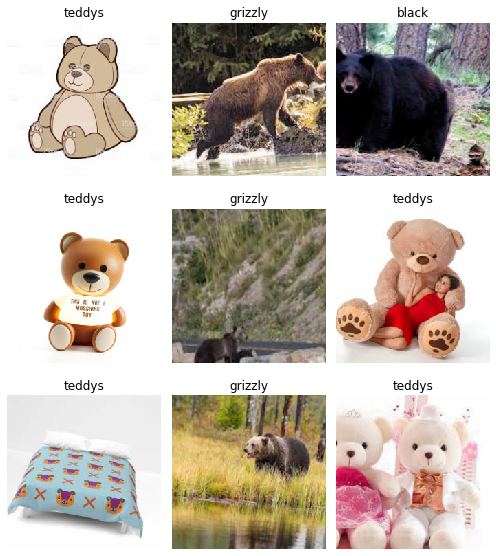

In [15]:
data.show_batch(rows=3,figsize=(7,8))

In [16]:
data.classes

['black', 'grizzly', 'teddys']

### data.c gives the number of labels

In [17]:
data.c 

3

In [18]:
len(data.train_ds)

384

In [19]:
len(data.valid_ds)

96

## Train model

In [20]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.167768,0.217459,0.083333,00:04
1,0.616845,0.054899,0.020833,00:02
2,0.420635,0.051703,0.010417,00:02
3,0.338593,0.048567,0.010417,00:02


In [22]:
learn.save('stage-1')

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


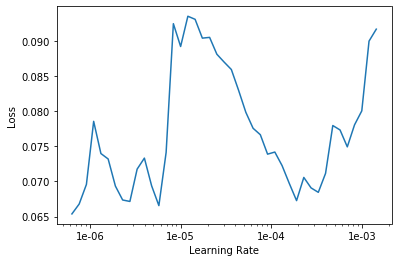

In [25]:
learn.recorder.plot()

The LR curve, we check for strongest downward slope. after 1e-5.. we pick 3e-5 for that as top LR

In [26]:
learn.fit_one_cycle(2,max_lr = slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.059065,0.046541,0.031250,00:02
1,0.044047,0.082959,0.031250,00:02


In [27]:
learn.save('stage-2')

## Interpretation

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

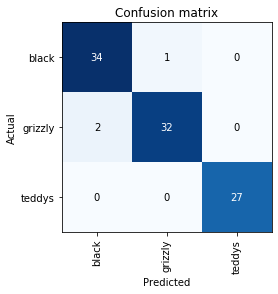

In [29]:
interp.plot_confusion_matrix()

## Cleaning up

https://towardsdatascience.com/fastai-image-classification-32d626da20

https://towardsdatascience.com/fantastic-and-straightforward-image-classification-with-fastai-library-for-pytorch-30c3380ac284

In [102]:
from fastai.widgets import *

ImageCleaner takes the top losses, remove images 

using from_toplosses -- we get the filepaths of the top losses ...
the top losses indexes and the corresponding data set is to be fed to ImageClearer


Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

https://medium.com/@ml_kid/how-to-save-our-model-to-google-drive-and-reuse-it-2c1028058cb2

https://stackoverflow.com/questions/54733395/how-should-i-deploy-the-trained-model-from-google-colab-to-my-computer

## Ipywidgets for Jupyter 

https://ipywidgets.readthedocs.io/en/latest/

## Putting the production level of the model

The production can be run on CPU --- more preferred than GPU

It is easy to scale on CPU than GPU.. We have a trained model and we are predicting on the trained model. we can use CPU.. We save the weights and then  use them for predictions

These models are good to deal with moderate amounts of data.
the problem would be if the noise is biased but not randomized


Initially, we need to have the list of classes with the order. Serialize the classes that we trained with

In [31]:
data.classes

['black', 'grizzly', 'teddys']

In this we are using GPU, but because production based is preferred on a CPU, we can switch to CPU

In [32]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [33]:
defaults.device = torch.device('cpu')

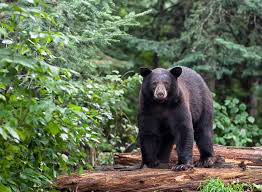

In [34]:
img = open_image(path/'black'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [36]:
path.ls()

[PosixPath('data/bears/export.pkl'),
 PosixPath('data/bears/urls_grizzly.csv'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/urls_teddys.csv'),
 PosixPath('data/bears/.ipynb_checkpoints'),
 PosixPath('data/bears/urls_black.csv')]

In [37]:
learn = load_learner(path)

In [38]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

## Problem areas

1. Learning rate too high or low
2. Number of epochs too high or low

### Learning rate too high

In [39]:
learn = cnn_learner(data, models.resnet34,metrics=error_rate)

Default lr is 0.003

In [40]:
learn.fit_one_cycle(1,max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,26.440746,56108188.000000,0.645833,00:02


Validation loss gets very high

#### IF VALIDATION LOSS IS VERY HIGH, THEN DECREASE LR

### Learning rate too low

In [41]:
learn = cnn_learner(data, models.resnet34,metrics=error_rate)

In [43]:
learn.fit_one_cycle(5,max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,2.137416,2.209227,0.802083,00:02
1,2.075891,1.836001,0.812500,00:02
2,2.091322,1.639388,0.718750,00:02
3,2.026700,1.558838,0.687500,00:02
4,2.008661,1.541027,0.687500,00:02


As compared to the initial LR error_rate, this error_rate fall is very low. In the initial case, by the end of 5 epochs, the error was 1%. here it is 68%. The error rate here gets better very slowly

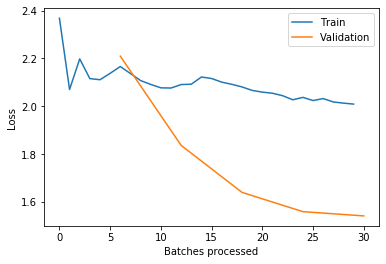

In [44]:
learn.recorder.plot_losses()

The fall is very slow. and

TRAINING LOSS > VALIDATION LOSS

#### IF THE ERROR RATE DECREASES VERY SLOWLY. THEN THE LEARNING RATE IS TOO LOW

#### Also Training loss is greater than validation loss -- this can also be because of number of epochs too low

For initial finetuning 0.003 is a good LR -- default LR

Next stage, LR finder, has 2 parts in the slice, the first part is what comes from the LR finder and the second part is  10 times less than 3e-3

The flow is as follows

learn.fit_one_cycle(4,3e-3) -- where 4 is number of epochs and 3e-3 is default

learn.unfreeze()



learn.fit_one_cycle(4,slice(xxxx,3e-4)) ---- xxxx is picked up from LR finder where it has strongest slope




### too few epochs

In [45]:
learn = cnn_learner(data, models.resnet34,metrics=error_rate)

In [46]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.778255,0.429173,0.114583,00:02


### Training loss much higher than the validation loss

Try a balance between epochs and LR

### Too many epochs 

This might result in overfitting


It is very hard to result in overfitting in Deep learning 

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [12]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.616315,1.796836,0.622685,00:04
1,1.495199,1.627990,0.615741,00:01
2,1.477473,1.458632,0.611111,00:01
3,1.431418,1.330276,0.587963,00:01
4,1.328721,1.164417,0.523148,00:01
5,1.220823,1.004774,0.458333,00:01
6,1.121171,0.850411,0.370370,00:01
7,1.018709,0.715875,0.305556,00:01
8,0.914208,0.609221,0.254630,00:01
9,0.830341,0.515576,0.206019,00:01


To overfit, we nneed to turn off everything -- Data augmentation, dropout, weight decay
Small learning rate for a long term

#### OVERFITTING -- error rate improves for a while and gets worst after awhile

### In general any model which is correctly fit will always have training loss < validation loss. 

error rate = 1- accuracy

accuracy == which prediction == actual value -- mean of this

## IN FASTAI THE METRICS (errorrate or accuracy) IS ALWAYS APPLIED ON VALIDATION SET

In [15]:
doc(accuracy)

accuracy [source] [test] accuracy ( input : Tensor , targs : Tensor ) → Rank0Tensor 
 
 × Tests found for accuracy : pytest -sv tests/test_metrics.py::test_accuracy [source] pytest -sv tests/test_vision_train.py::test_accuracy [source] To run tests please refer to this guide . Computes accuracy with targs when input is bs * n_classes. 
 Show in docs

Another way to improve accuracy is also to get more data

Any image is a matrix of numbers

if it is a colored image it is a 3D matrix -- tensor of R,G,B

In the above model, the images which are represented as numbers. A mathematcial model is created that took the numbers from the images. The model converted those images (numbers) and converted it to a probability of three numbers. We find the maximum probability and assign it to the number

The argmax would give the actual number

In [17]:
doc(learn.predict)

predict [source] [test] predict ( item : ItemBase , return_x : bool = False , batch_first : bool = True , with_dropout : bool = False , ** kwargs ) 
 
 × Tests found for predict : pytest -sv tests/test_vision_train.py::test_models_meta [source] pytest -sv tests/test_vision_train.py::test_preds [source] To run tests please refer to this guide . Return predicted class, label and probabilities for item . 
 Show in docs